In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)

In [4]:
data = pd.read_csv("C:/Users/Robert/Documents/Dokumenty Julii/Studia/IV Semestr/Wstęp do uczenia maszynowego/Projekt 1/YoutubeCommentsDataSet.csv",sep = ",")

# Stworzenie zmiennej "Comment"

In [5]:
data = data.dropna(subset = ["Comment"])
data['Comment_Length'] = data['Comment'].str.len()
data.isna().sum()

Comment           0
Sentiment         0
Comment_Length    0
dtype: int64

In [6]:
data.describe()

,Comment_Length
count,18364.000000
mean,177.554128
std,251.049895
min,2.000000
25%,66.000000
50%,113.000000
75%,201.000000
max,7847.000000


# Rozkład zmiennej "Sentiment"

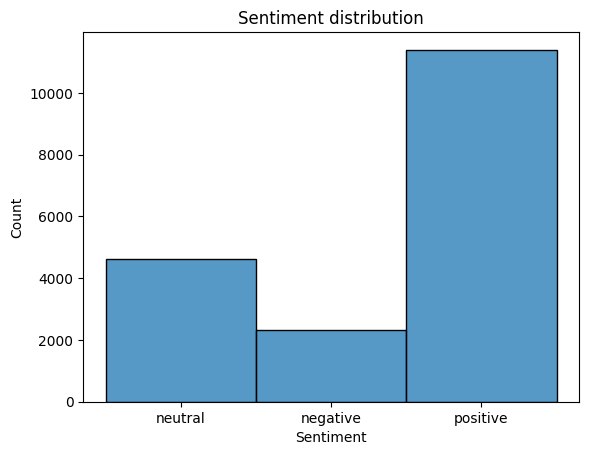

In [7]:
sentiments = sns.histplot(data['Sentiment'])
sentiments.set_title("Sentiment distribution")
plt.show()

In [8]:
data

,Comment,Sentiment,Comment_Length
0,lets not forget that apple pay in 2014 require...,neutral,317
1,here in nz 50 of retailers don’t even have con...,negative,163
2,i will forever acknowledge this channel with t...,positive,183
3,whenever i go to a place that doesn’t take app...,negative,450
4,apple pay is so convenient secure and easy to ...,positive,135
...,...,...,...
18403,i really like the point about engineering tool...,positive,277
18404,i’ve just started exploring this field and thi...,positive,118
18405,excelente video con una pregunta filosófica pr...,neutral,244
18406,hey daniel just discovered your channel a coup...,positive,88


# Rozkład zmiennej "Comment"

<Axes: xlabel='Comment_Length', ylabel='Count'>

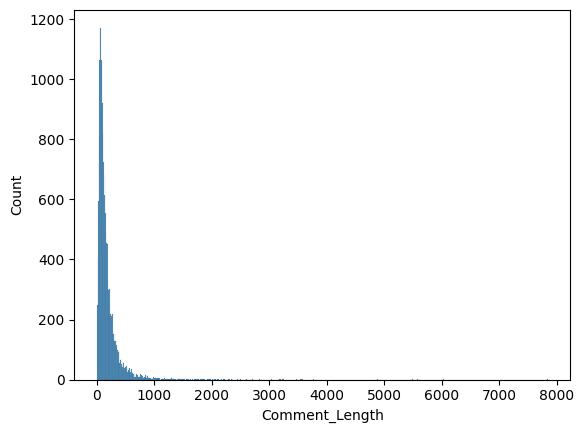

In [9]:
sns.histplot(data['Comment_Length'])

In [10]:
data['Comment_Length'].describe()

count    18364.000000
mean       177.554128
std        251.049895
min          2.000000
25%         66.000000
50%        113.000000
75%        201.000000
max       7847.000000
Name: Comment_Length, dtype: float64

In [11]:
data['Comment_Length']

0        317
1        163
2        183
3        450
4        135
        ... 
18403    277
18404    118
18405    244
18406     88
18407    404
Name: Comment_Length, Length: 18364, dtype: int64

In [12]:
data.sort_values(by="Comment_Length", ascending = True)

,Comment,Sentiment,Comment_Length
16473,jó,neutral,2
11631,哈哈,neutral,2
10926,6th,positive,3
11112,wow,positive,3
10520,bye,neutral,3
...,...,...,...
11370,i found this very interesting and as someone w...,positive,5487
10493,tracklist 0000 kanisan ft wishes and dreams m...,neutral,5586
18276,000000 00 introduction to the video speaker ml...,neutral,5597
16407,description of exclusive video footage 110 pan...,neutral,6031


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18364 entries, 0 to 18407
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Comment         18364 non-null  object
 1   Sentiment       18364 non-null  object
 2   Comment_Length  18364 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 573.9+ KB


In [24]:
bins = [0, data['Comment_Length'].quantile(0.25), data['Comment_Length'].quantile(0.5), data['Comment_Length'].quantile(0.75), data['Comment_Length'].max()]
labels = ['short', 'medium', 'long', 'very long']
data['Comment_Length_Binned'] = pd.cut(data['Comment_Length'],bins = bins, labels = labels, right = False)

<Axes: xlabel='Comment_Length_Binned', ylabel='Count'>

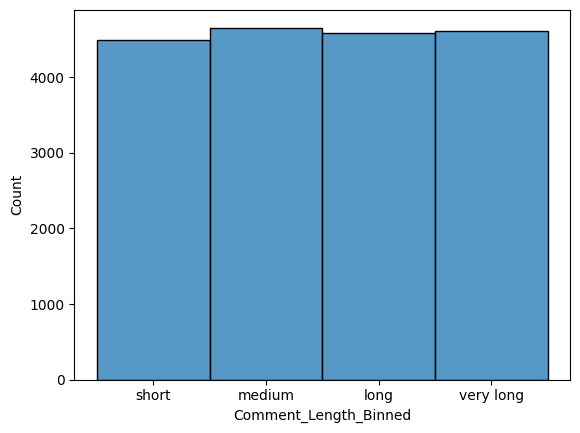

In [25]:
sns.histplot(data['Comment_Length_Binned'])

# Stworzenie zmiennej "Starts_with_i"

In [14]:
data['Starts_with_i'] = data['Comment'].str.startswith("i")

In [15]:
start_i = data[data['Starts_with_i'] == True]

In [16]:
start_i

,Comment,Sentiment,Comment_Length,Starts_with_i
2,i will forever acknowledge this channel with t...,positive,183,True
8,in the united states we have an abundance of r...,positive,209,True
9,in cambodia we have a universal qr code system...,neutral,227,True
15,i love the direction this channel is going mos...,positive,306,True
16,i am more excited for the ltt lab than i have ...,positive,194,True
...,...,...,...,...
18399,i came for a machine learning related talk but...,positive,280,True
18400,ive worked for about 2 years with mlcomputer v...,positive,777,True
18401,i come from a physics background and usually w...,positive,609,True
18403,i really like the point about engineering tool...,positive,277,True


<Axes: xlabel='Sentiment', ylabel='Count'>

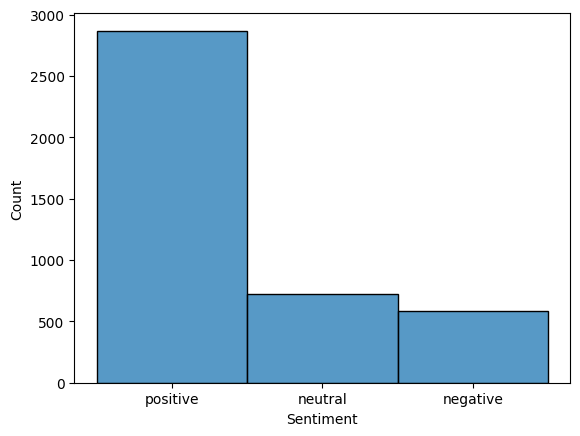

In [17]:
sns.histplot(start_i['Sentiment'])